# SyncMaster

> Device and drivers for generating trigger signals to synchronise recorded signals with behavioural data

In [ ]:
#|hide
%load_ext autoreload
%autoreload 2

In [ ]:
#|hide
import syncmaster
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#|hide
sns.set()
sns.set_context('talk')
sns.set_style('ticks')

This file will become your README and also the index of your documentation.

## Installation

```sh
pip install syncmaster
```

## Example application

Fill me in please! Don't forget code examples:

In [ ]:
#|eval: false
# Import library
import syncmaster

# Create device object
device = syncmaster.SyncMaster()

# Run trial with start and end signals
device.start()    # Send start signal

''' Run behavioural task '''

device.end()      # Send end signal

# Close communication channel when finished
device.close()

## Output

[[<matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>]]

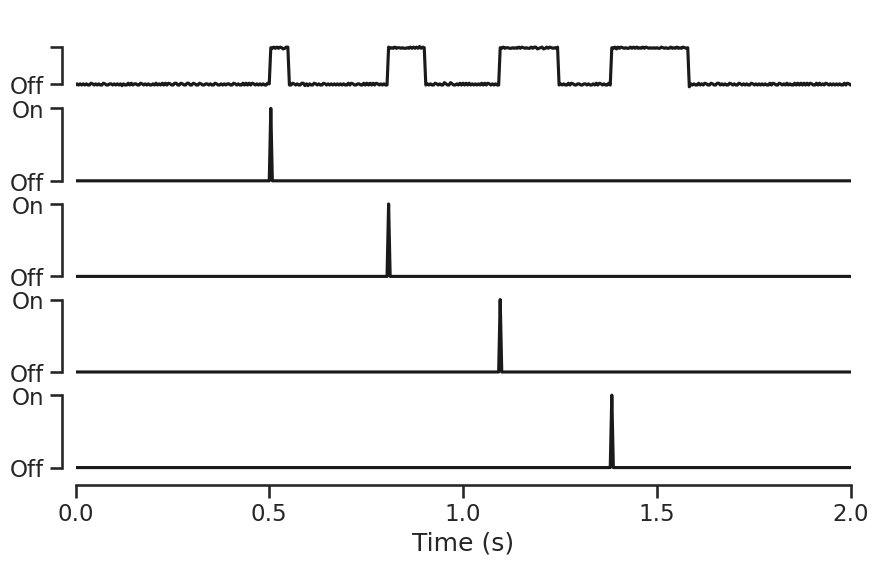

In [ ]:
#|echo:false
# Load data
data = np.loadtxt('./example_data/all_triggers.csv', delimiter=',', skiprows=2, usecols=[0,1])

t = data[:, 0]
v = data[:, 1]

t = t + 0.5

# Get events
events = syncmaster.getEvents(v, 250)

# Plot results
# Plot results
fig, ax = plt.subplots(5, 1, sharex='row', figsize=(10,6))

ax[0].plot(t, v, 'k')
ax[1].plot(t, events[0,:], 'k')
ax[2].plot(t, events[1,:], 'k')
ax[3].plot(t, events[2,:], 'k')
ax[4].plot(t, events[3,:], 'k')

for ax_ in ax:
    sns.despine(ax=ax_, offset=10, trim=True)
    
    ax_.set(
        yticks = (0, 1),
        yticklabels = ['Off', 'On'],
        xlim = (0, 2)
    )
    
for ax_ in ax[:-1]:
    ax_.get_xaxis().set_visible(False)
    ax_.spines['bottom'].set_visible(False)
    
ax[-1].set(
    xlabel = 'Time (s)',
)

ax[0].set(
    yticks = (0, np.max(v))
)